In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('../data/obento/train.csv', header=None)
df_train.columns = ['Date', 'Sale', 'Week', 'Sold Out', 'Menu', 'Cal', 'Desc', 'Event', 'Sal', 'Weather', 'Prec', 'Temp']
df_train.head(10)

,Date,Sale,Week,Sold Out,Menu,Cal,Desc,Event,Sal,Weather,Prec,Temp
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,NaN,快晴,--,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,NaN,晴れ,--,14.7
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,NaN,快晴,--,12.1


In [4]:
week_dum = pd.get_dummies(df_train['Week']).ix[:, ['月', '火', '水', '木', '金']]
week_dum.columns = ['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.']
week_dum.head(5)

,Mon.,Tue.,Wed.,Thu.,Fri.
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [5]:
weather_dum = pd.get_dummies(df_train['Weather'])
weather_dum.columns = ['Clear', 'Sunny', 'Cloudy', 'Slightly', 'Rainy', 'Snow', 'Thunder']
weather_dum.head(5)

,Clear,Sunny,Cloudy,Slightly,Rainy,Snow,Thunder
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [7]:
df_train_proc = pd.concat([df_train, week_dum], axis=1)
df_train_proc.drop('Week', axis=1, inplace=True)
df_train_proc = pd.concat([df_train_proc, weather_dum], axis=1)
df_train_proc.drop('Weather', axis=1, inplace=True)
df_train_proc.head(5)

,Date,Sale,Sold Out,Menu,Cal,Desc,Event,Sal,Prec,Temp,...,Wed.,Thu.,Fri.,Clear,Sunny,Cloudy,Slightly,Rainy,Snow,Thunder
0,2013-11-18,90,0,厚切りイカフライ,NaN,NaN,NaN,NaN,--,19.8,...,0,0,0,1,0,0,0,0,0,0
1,2013-11-19,101,1,手作りヒレカツ,NaN,NaN,NaN,NaN,--,17.0,...,0,0,0,1,0,0,0,0,0,0
2,2013-11-20,118,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,--,15.5,...,1,0,0,1,0,0,0,0,0,0
3,2013-11-21,120,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,--,15.2,...,0,1,0,1,0,0,0,0,0,0
4,2013-11-22,130,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,--,16.1,...,0,0,1,1,0,0,0,0,0,0


In [8]:
df_train.isnull().sum()

Date          0
Sale          0
Week          0
Sold Out      0
Menu          0
Cal          41
Desc        186
Event       193
Sal         197
Weather       0
Prec          0
Temp          0
dtype: int64

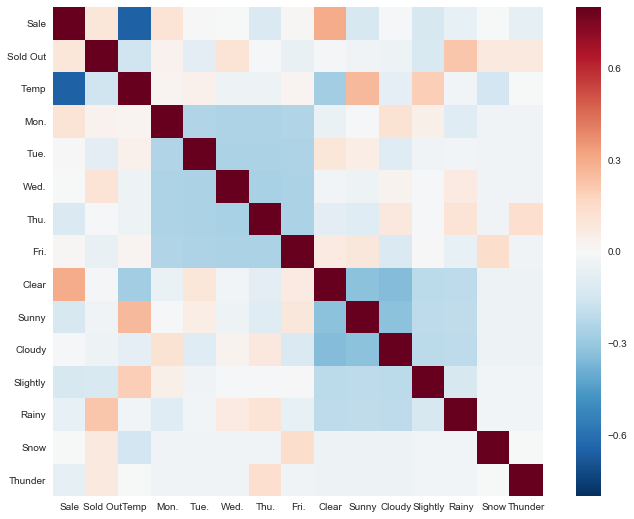

In [9]:
df_train_proc_dn = df_train_proc.copy()
df_train_proc_dn.drop('Cal', axis=1, inplace=True)
df_train_proc_dn.drop('Desc', axis=1, inplace=True)
df_train_proc_dn.drop('Event', axis=1, inplace=True)
df_train_proc_dn.drop('Sal', axis=1, inplace=True)
df_train_proc_dn.drop('Prec', axis=1, inplace=True)
df_train_proc_dn.drop('Menu', axis=1, inplace=True)

corrmat = df_train_proc_dn.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

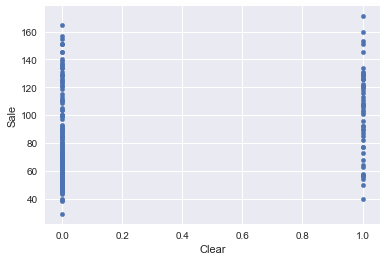

In [11]:
data = pd.concat([df_train_proc['Sale'], df_train_proc['Clear']], axis=1)
data.plot.scatter(x='Clear', y='Sale')

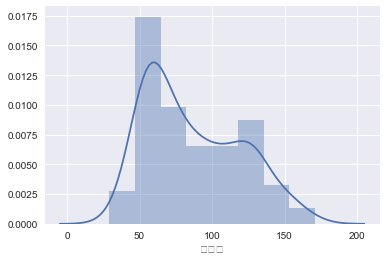

In [9]:
sns.distplot(df_train['販売数'])

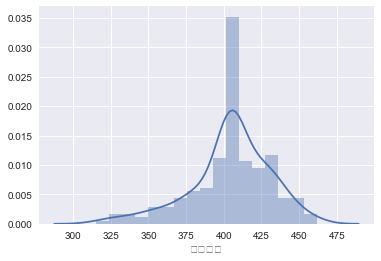

In [14]:
sns.distplot(df_train['カロリー'].fillna(df_train['カロリー'].mean()))